In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import shap
shap.initjs()

import xgboost as xgb


/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv("IRIS.csv")
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
species_encoder = {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
data["species"] = data["species"].map(species_encoder)


In [4]:
data.loc[data['species'] == 0, 'color'] = 'blue'
data.loc[data['species'] == 1, 'color'] = 'orange'
data.loc[data['species'] == 2, 'color'] = 'green'


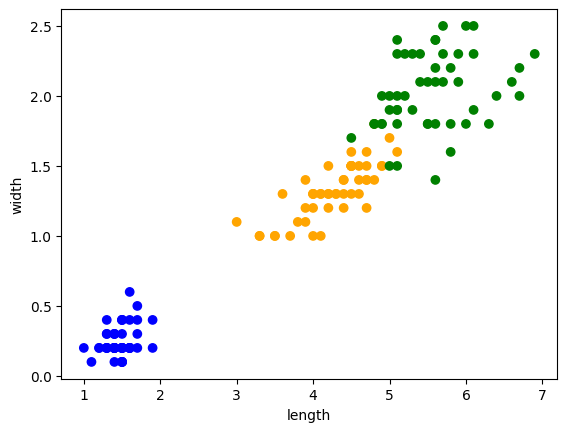

In [5]:
plt.scatter(data['petal_length'], data['petal_width'], color=data['color'])
plt.ylabel('width')
plt.xlabel('length');


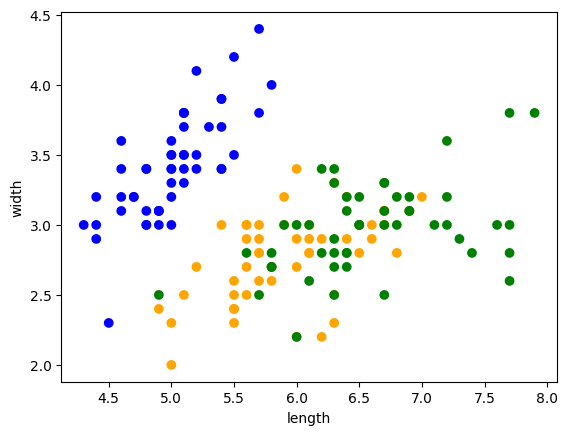

In [6]:
plt.scatter(data['sepal_length'], data['sepal_width'], color=data['color'])
plt.ylabel('width')
plt.xlabel('length');


<Axes: >

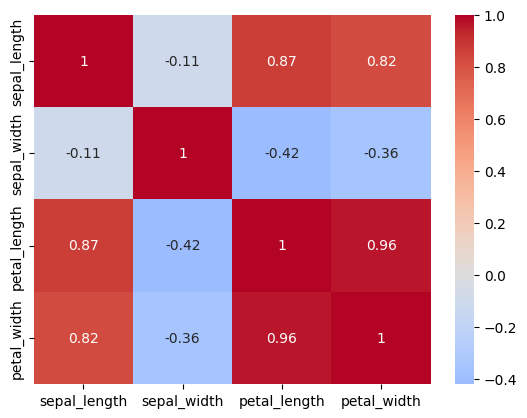

In [7]:
 corr = data.drop(['species', 'color'], axis=1).corr()
 sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt='.2g')


In [8]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']


In [9]:
model = xgb.XGBRegressor(objective="reg:squarederror")
model.fit(X, y)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

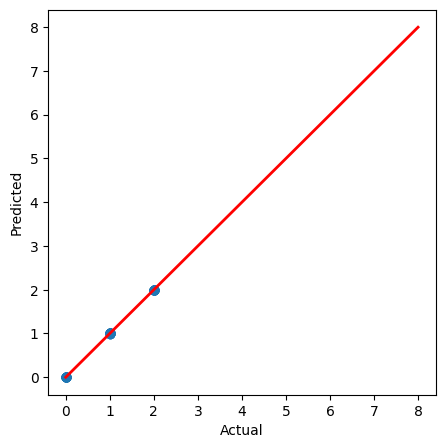

In [10]:
y_pred = model.predict(X)

plt.figure(figsize=(5, 5))

plt.scatter(y, y_pred)
plt.plot(
        [0, 8],
        [0, 8],
        color='red',
        linestyle='-',
        linewidth=2)

plt.ylabel('Predicted')
plt.xlabel('Actual');


In [11]:
explainer = shap.Explainer(model)
shap_values = explainer(X)


## Waterfall Plot

In [12]:
np.shape(shap_values.values)


(150, 4)

In [13]:
shap_values[0]


.values =
array([-0.01615805, -0.0159025 , -0.8814383 , -0.08647445], dtype=float32)

.base_values =
1.0000002

.data =
array([5.1, 3.5, 1.4, 0.2])

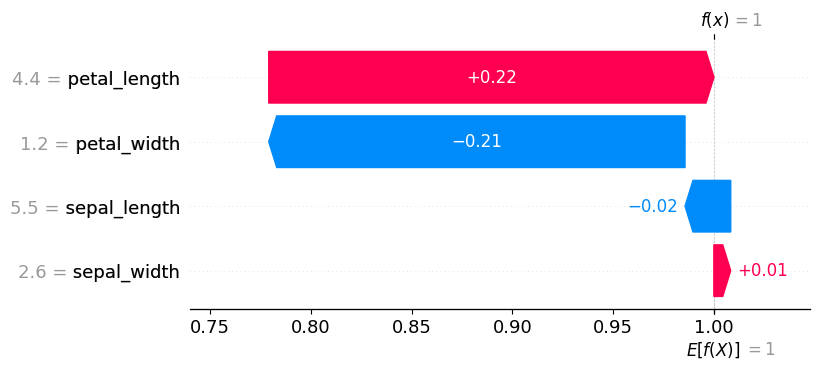

In [16]:
shap.plots.waterfall(shap_values[90])


In [19]:
shap.plots.force(shap_values[90])


In [20]:
shap.plots.force(shap_values[:100])


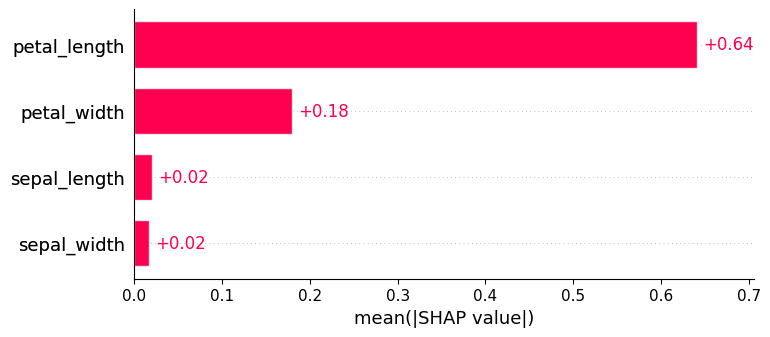

In [21]:
shap.plots.bar(shap_values)


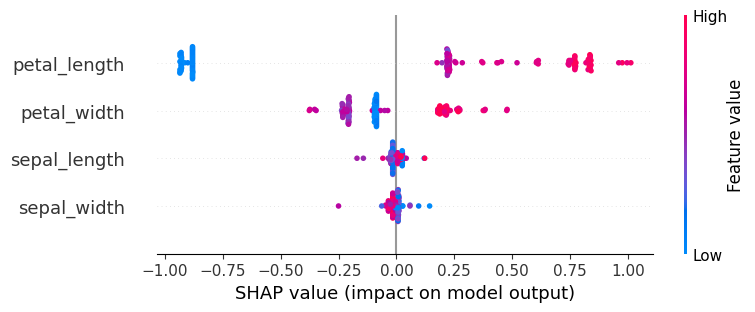

In [22]:
shap.plots.beeswarm(shap_values)


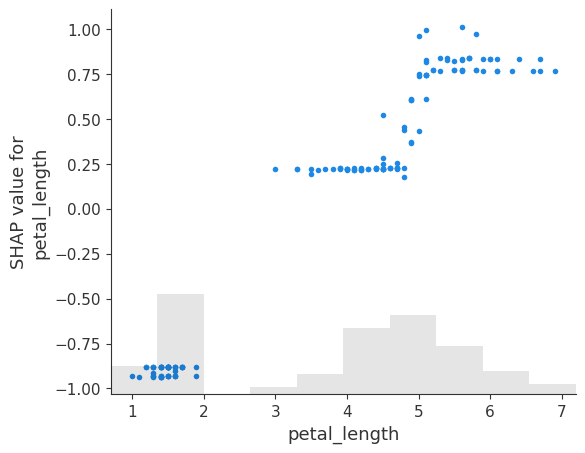

In [23]:
shap.plots.scatter(shap_values[:, "petal_length"])


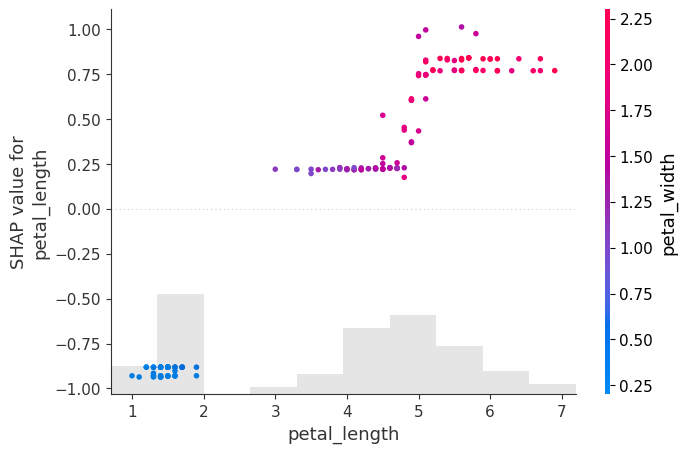

In [25]:
shap.plots.scatter(shap_values[:, "petal_length"],
    color=shap_values[:, "petal_width"])
